# Virus Chino

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
mainpath = "C:/Users/Guany/Documents/"
filename = "Covid19casos.csv"
fullpath = os.path.join(mainpath, filename)

In [3]:
VC = pd.read_csv(fullpath)
VC.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-04-20
1,10000000,F,52.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2021-04-20
2,10000001,F,22.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2021-04-20
3,10000002,F,43.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2021-04-20
4,10000003,F,33.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2021-04-20


In [4]:
VC.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,9.274758e+06,9.270284e+06,9.274758e+06,9.274758e+06,9.274758e+06,9.274758e+06
mean,5.881765e+06,3.920248e+01,2.452579e+01,2.301775e+01,2.430423e+01,1.911772e+02
std,2.869778e+06,1.819130e+01,1.737495e+01,2.917045e+01,2.943078e+01,2.487028e+02
min,6.720640e+05,-1.800000e+01,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,3.408753e+06,2.600000e+01,9.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
50%,5.897062e+06,3.700000e+01,1.600000e+01,6.000000e+00,6.000000e+00,6.300000e+01
75%,8.364698e+06,5.100000e+01,4.200000e+01,3.400000e+01,3.800000e+01,3.710000e+02
max,1.081748e+07,2.210000e+02,5.300000e+01,9.400000e+01,9.900000e+01,8.820000e+02


In [5]:
pd.isnull(VC["edad_años_meses"]).values.ravel().sum()

0

In [6]:
VC["fecha_diagnostico"] = pd.to_datetime(VC["fecha_diagnostico"])

In [7]:
pd.isnull(VC["edad"]).values.ravel().sum()

4474

In [8]:
VC["edad"].mean()

39.20248095959088

In [9]:
VC["edad"].describe()

count    9.270284e+06
mean     3.920248e+01
std      1.819130e+01
min     -1.800000e+01
25%      2.600000e+01
50%      3.700000e+01
75%      5.100000e+01
max      2.210000e+02
Name: edad, dtype: float64

In [10]:
VC.loc[737]

id_evento_caso                                 10000699
sexo                                                  M
edad                                                 36
edad_años_meses                                    Años
residencia_pais_nombre                        Argentina
residencia_provincia_nombre                Buenos Aires
residencia_departamento_nombre          Almirante Brown
carga_provincia_nombre                             CABA
fecha_inicio_sintomas                               NaN
fecha_apertura                               2021-04-08
sepi_apertura                                        14
fecha_internacion                                   NaN
cuidado_intensivo                                    NO
fecha_cui_intensivo                                 NaN
fallecido                                            NO
fecha_fallecimiento                                 NaN
asistencia_respiratoria_mecanica                     NO
carga_provincia_id                              

In [11]:
VC.loc[VC['edad_años_meses'] == "Meses", ["edad"]] = 0
VC.loc[VC['edad_años_meses'] == "Meses",  ['edad_años_meses']]= "Años"
VC = VC.drop(VC[VC['edad_años_meses'] == 39].index)
VC = VC.drop(VC[VC['sexo'] == 39].index)

In [12]:
VC['sexo'].value_counts()

F     4779689
M     4396391
NR      98678
Name: sexo, dtype: int64

In [13]:
pd.isnull(VC["edad"]).values.ravel().sum()

4474

In [14]:
VC["edad"] = VC["edad"].fillna(int(VC["edad"].mean()))

In [15]:
#VC[VC['edad'] >= 105] = int(VC["edad"].mean())
#VC[VC['edad'] < 0] = int(VC["edad"].mean())
VC.loc[VC['edad']  > 105, ["edad"]] = int(VC["edad"].mean())
VC.loc[VC['edad'] < 0 ,  ['edad']]= int(VC["edad"].mean())

In [16]:
VC["edad"].mean()

39.17706995697354

In [17]:
VC["edad_años_meses"].value_counts()

Años    9274758
Name: edad_años_meses, dtype: int64

In [18]:
VC[VC["edad_años_meses"] == 39]

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion


In [19]:
VC['edad'].value_counts()

29.0     232283
30.0     231940
32.0     222044
31.0     220367
34.0     219761
28.0     219232
33.0     215708
26.0     212660
27.0     211974
35.0     209455
39.0     206309
25.0     203854
36.0     198595
38.0     198243
41.0     197928
37.0     196029
24.0     194128
40.0     192573
42.0     189575
43.0     183616
23.0     180075
44.0     171952
22.0     167483
45.0     165527
46.0     158826
21.0     155567
47.0     147362
48.0     146856
49.0     144937
20.0     140501
          ...  
77.0      30260
78.0      27921
79.0      25833
0.0       25040
80.0      24847
81.0      23337
82.0      20998
83.0      19768
84.0      18704
85.0      17605
86.0      16209
87.0      14994
88.0      14110
89.0      13127
90.0      12061
91.0      10006
92.0       8578
93.0       7297
94.0       5762
95.0       4465
96.0       3491
97.0       2478
98.0       1896
99.0       1191
100.0       806
101.0       423
102.0       223
103.0       162
104.0        65
105.0        57
Name: edad, Length: 106,

In [20]:
VC['edad'].min()

0.0

In [21]:
VC['edad'].max()

105.0

In [22]:
VC["edad"].mode()

0    29.0
dtype: float64

Text(0.5,1,'Histograma de distribucion de pacientes covid por edad')

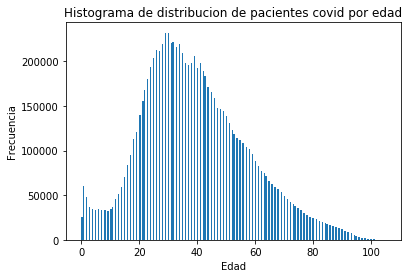

In [23]:
plt.hist(VC["edad"], bins= 200)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de distribucion de pacientes covid por edad")

In [24]:
VC["edad"].describe()

count    9.274758e+06
mean     3.917707e+01
std      1.821296e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.700000e+01
75%      5.000000e+01
max      1.050000e+02
Name: edad, dtype: float64

Text(0.5,1,'Boxplot de pacientes por edad')

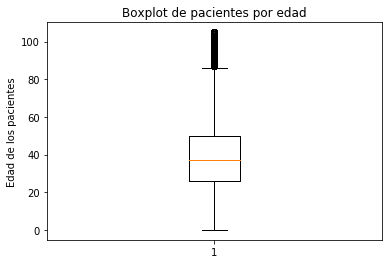

In [25]:
plt.boxplot(VC["edad"])
plt.ylabel("Edad de los pacientes")
plt.title("Boxplot de pacientes por edad")

In [26]:
VC["edad"].mode()

0    29.0
dtype: float64

In [27]:
VC['edad_años_meses'].unique()

array(['Años'], dtype=object)

Text(0.5,1,'Histograma de distribucion de pacientes covid por sexo')

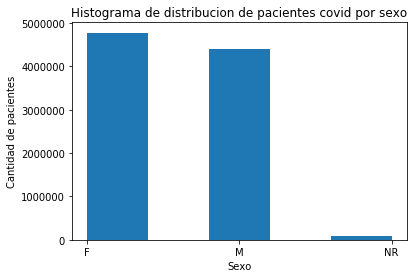

In [28]:
#plt.hist(VC["sexo"], bins=5)
#plt.xlabel("Sexo")
#plt.ylabel("Cantidad de pacientes")
#plt.title("Histograma de distribucion de pacientes covid por sexo")

In [29]:
VC["sexo"].value_counts()

F     4779689
M     4396391
NR      98678
Name: sexo, dtype: int64

In [178]:
confirmados = VC[["clasificacion_resumen", "fecha_diagnostico", "residencia_provincia_nombre" , "fallecido", "fecha_fallecimiento" ]]

In [179]:
confirmados = confirmados.replace(to_replace="Confirmado", value=1)

In [180]:
confirmados["fallecido"] = confirmados.fallecido.replace(to_replace="SI", value=1)
confirmados["fallecido"] = confirmados.fallecido.replace(to_replace="NO", value=0)
confirmados["fecha_fallecimiento"] = confirmados["fecha_fallecimiento"].fillna("N")

In [181]:
confirmados["fecha_fallecimiento"].isnull().sum()

0

In [182]:
type(confirmados["fecha_diagnostico"][5])

pandas._libs.tslibs.timestamps.Timestamp

In [183]:
confirmados = confirmados.dropna()

In [184]:
confirmados = confirmados[confirmados["clasificacion_resumen"]== 1]

In [185]:
confirmados[confirmados["residencia_provincia_nombre"]=="SIN ESPECIFICAR"]

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
715,1,2021-04-14,SIN ESPECIFICAR,0,N
755,1,2021-04-19,SIN ESPECIFICAR,0,N
2786,1,2021-04-09,SIN ESPECIFICAR,0,N
4727,1,2021-03-31,SIN ESPECIFICAR,0,N
5508,1,2020-05-30,SIN ESPECIFICAR,0,N
11637,1,2021-04-07,SIN ESPECIFICAR,0,N
12153,1,2021-04-09,SIN ESPECIFICAR,0,N
13329,1,2021-04-08,SIN ESPECIFICAR,0,N
14127,1,2021-04-07,SIN ESPECIFICAR,0,N
17223,1,2021-04-10,SIN ESPECIFICAR,0,N


In [186]:
#confirmados = confirmados.drop(labels="clasificacion_resumen", axis=1)

In [187]:
#confirmados = confirmados.drop(labels=2192241, axis=0)
#confirmados = confirmados.drop(labels=2337905, axis=0)
#confirmados = confirmados.drop(labels=2440280, axis=0)
#confirmados = confirmados.drop(labels=4794269, axis=0)
#confirmados = confirmados.drop(labels=1619136, axis=0)
#confirmados = confirmados.drop(labels=6949111, axis=0)
#confirmados = confirmados.drop(labels=1824030, axis=0)

In [188]:
confirmados = confirmados[confirmados["fecha_diagnostico"] > "2020-03-02"]

In [207]:
confirmados["fecha_diagnostico"] = pd.to_datetime(confirmados["fecha_diagnostico"])

In [208]:
confirmados = confirmados.sort_values("fecha_diagnostico")

In [209]:
confirmados = confirmados.reset_index()

In [210]:
confirmados = confirmados.drop(labels="index", axis=1)

In [211]:
type(confirmados["fecha_diagnostico"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [230]:
confirmados[confirmados["fallecido"]==1]

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
8,1,2020-03-07,CABA,1,2020-03-07
31,1,2020-03-12,Chaco,1,2020-03-13
38,1,2020-03-12,Buenos Aires,1,2020-03-24
45,1,2020-03-13,CABA,1,2020-03-18
60,1,2020-03-15,CABA,1,2020-07-11
62,1,2020-03-15,Chaco,1,2020-03-31
114,1,2020-03-18,Chaco,1,2020-03-24
116,1,2020-03-18,CABA,1,2020-04-30
134,1,2020-03-19,Córdoba,1,2020-04-15
167,1,2020-03-20,Buenos Aires,1,2020-03-21


In [235]:
confirmados["clasificacion_resumen"]=1

In [237]:
confirmgroup = confirmados.groupby("fecha_diagnostico")

In [238]:
confirmgroup.head(5)

,clasificacion_resumen,fecha_diagnostico,residencia_provincia_nombre,fallecido,fecha_fallecimiento
0,1,2020-03-03,CABA,0,N
1,1,2020-03-06,CABA,0,N
2,1,2020-03-06,Neuquén,0,N
3,1,2020-03-06,Córdoba,0,N
4,1,2020-03-06,Buenos Aires,0,N
5,1,2020-03-06,CABA,0,N
8,1,2020-03-07,CABA,1,2020-03-07
9,1,2020-03-08,CABA,0,N
10,1,2020-03-08,CABA,0,N
11,1,2020-03-09,Río Negro,0,N


In [239]:
confirmgroup = confirmgroup.sum()

In [240]:
confirmados.groupby("fecha_diagnostico").sum()

,clasificacion_resumen,fallecido
fecha_diagnostico,,
2020-03-03,1,0
2020-03-06,7,0
2020-03-07,1,1
2020-03-08,2,0
2020-03-09,6,0
2020-03-10,9,0
2020-03-11,4,0
2020-03-12,10,2
2020-03-13,7,1


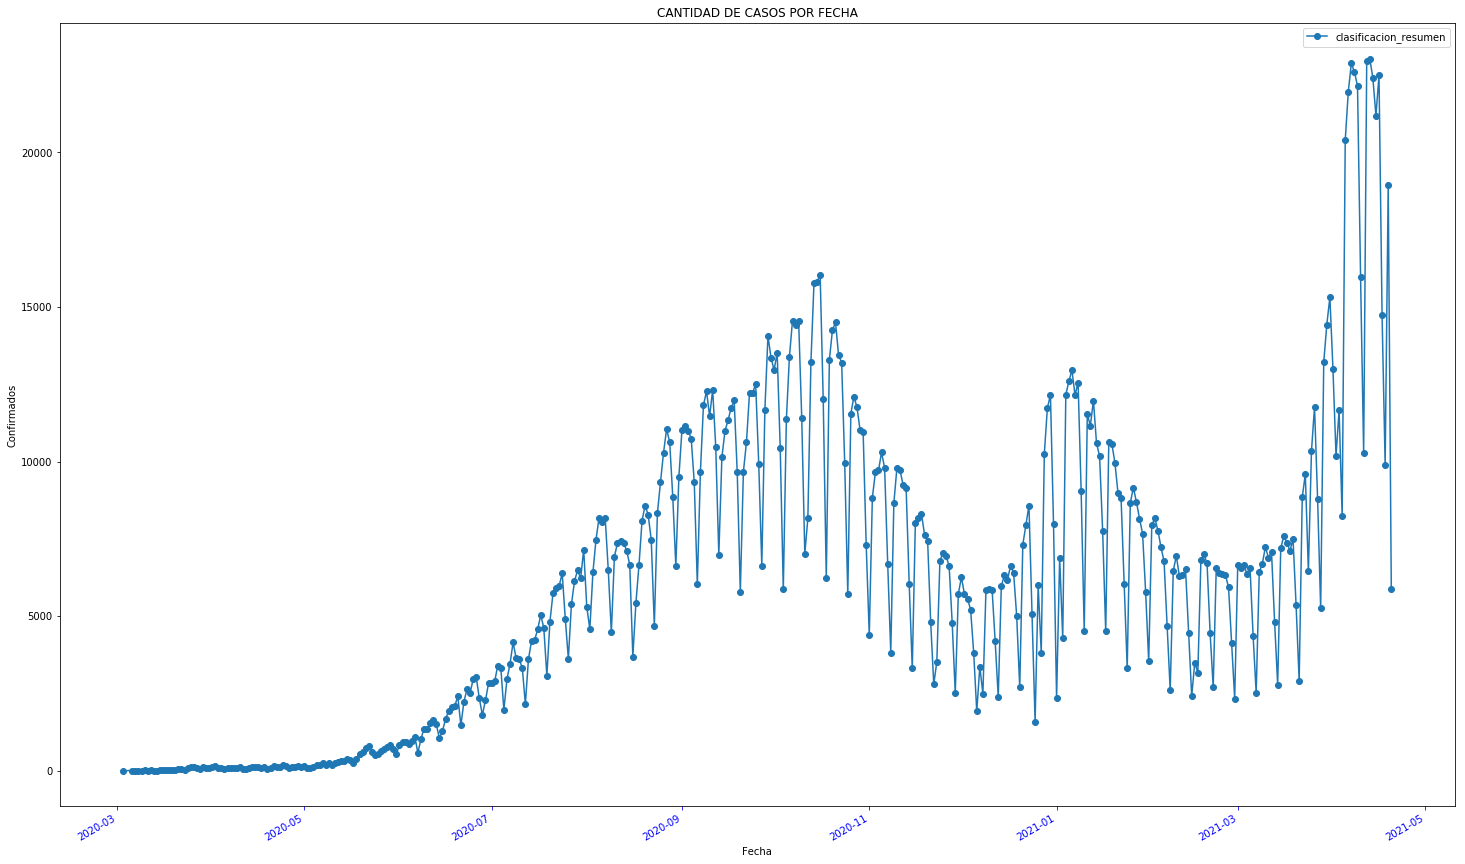

In [245]:
confirmgroup.plot(kind="line",y="clasificacion_resumen", figsize=(25,16), marker= "o")
#linestyle"--""
plt.xlabel("Fecha")
plt.title("CANTIDAD DE CASOS POR FECHA")
plt.tick_params('x', colors='blue')
plt.ylabel("Confirmados")
plt.show()

In [155]:
fall = pd.DataFrame()
fall["fallecido"] = confirmados["fallecido"]
fall["fecha_fallecimiento"] = confirmados["fecha_fallecimiento"]

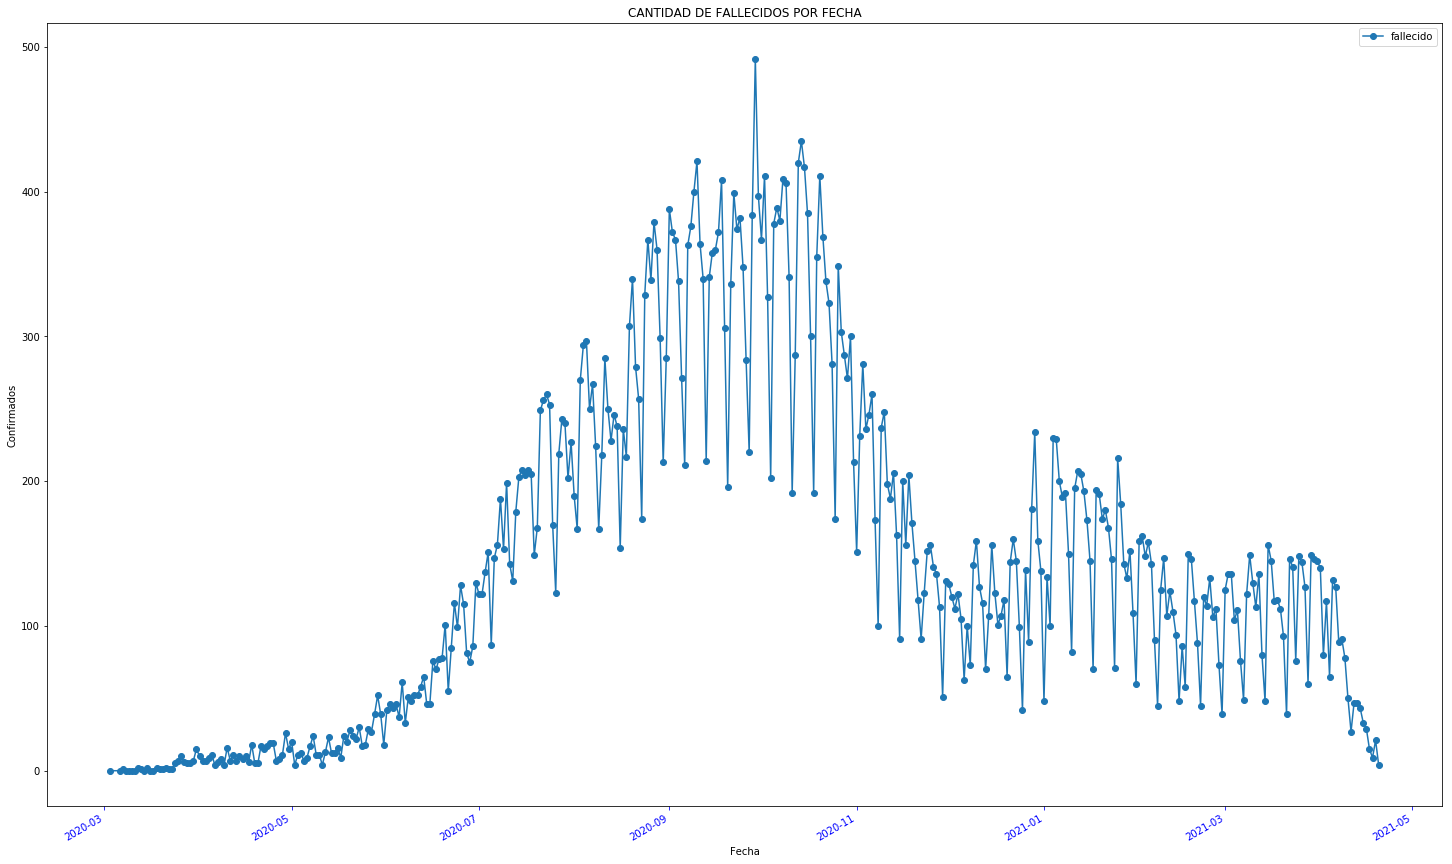

In [246]:
confirmgroup.plot(kind="line",y="fallecido", figsize=(25,16), marker= "o")
#linestyle"--""
plt.xlabel("Fecha")
plt.title("CANTIDAD DE FALLECIDOS POR FECHA")
plt.tick_params('x', colors='blue')
plt.ylabel("Confirmados")
plt.show()

In [ ]:
confirmgroup.head()

In [ ]:
confirmgroup = confirmgroup.reset_index()

In [ ]:
cont = 1
dataregresion = pd.DataFrame(columns=["Fecha", "Positivos", "Dia"])
dataregresion["Positivos"] = confirmgroup["clasificacion_resumen"]
dataregresion["Fecha"] = confirmgroup["fecha_diagnostico"]
dataregresion.reset_index()
for i in range (len(confirmgroup)):
    dataregresion["Dia"][i] = cont
    cont = cont + 1

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_pred = dataregresion["Dia"]
X_pred = X_pred[:,np.newaxis]
Y = dataregresion["Positivos"]

In [ ]:
lm = LinearRegression()
lm.fit(X_pred, Y)

In [ ]:
lm.intercept_


In [ ]:
lm.coef_

In [ ]:
lm.score(X_pred, Y)

#### y = 1088.67 + 22.32 * dia

In [ ]:
%matplotlib inline
plt.plot(X_pred,Y, "ro")
plt.plot(X_pred, lm.predict(X_pred), color="blue")

In [ ]:
SSD = np.sum((Y - lm.predict(X_pred))**2)
RSE = np.sqrt(SSD/(len(X_pred)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

#### intentando una cuadratica

In [ ]:
X_data = X**2
X_data = np.asarray(X_data)
X_data = X_data[:,np.newaxis]
lm = LinearRegression()
lm.fit(X_data, Y)
lm.score(X_data, Y)

In [ ]:
dataregresion.tail

In [ ]:
dataregresion_corto = dataregresion[(dataregresion["Fecha"]>"2021-03-18") & (dataregresion["Fecha"]<"2021-04-14")]

In [ ]:
dataregresion_corto.tail(5)

In [ ]:
dataregresion_corto = dataregresion_corto.reset_index()

In [ ]:
dataregresion_corto = dataregresion_corto.drop(labels="index", axis=1)

In [ ]:
#X_data = dataregresion_corto["Dia"]
X_data =np.arange(0,len(dataregresion_corto))
X_data = X_data[:,np.newaxis]
Y = dataregresion_corto["Positivos"]

In [ ]:
lm = LinearRegression()
lm.fit(X_data, Y)

In [ ]:
lm.intercept_, lm.coef_ , lm.score(X_data, Y), 

#### Funcion y= 1701.28 + 68.153 + Dia Numero

In [ ]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

In [ ]:
%matplotlib inline
plt.plot(X_data,Y, "ro")
plt.plot(X_data, lm.predict(X_data), color="blue")

In [ ]:
dataregresion_corto[(dataregresion_corto["Dia"] > 387) & (dataregresion_corto["Positivos"] < 10000) ]

In [ ]:
#dataregresion_corto = dataregresion_corto.drop([8, 9, 16, 23]) #LIMPIANDO OUTLIERS